- LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
- SEX: пол клиента (1 = мужской, 2 = женский )
- EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
- MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
- AGE: возраст в годах
- PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. - - - Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
- BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
- PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
- default - индикатор невозврата денежных средств (0-вернул; 1-не вернул)

**Задание**

1. Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?
2. Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)
3. Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?
4. Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.
5. Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [1]:
import pandas as pd
import numpy as np

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
credits = pd.read_csv('credit_card_default_analysis.csv', sep = ',', header = 0)
credits.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
credits.shape

(30000, 25)

## Task 1

In [22]:
# проверьте гипотезу о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки
returned = credits.query("default==0")
not_returned = credits.query("default==1")

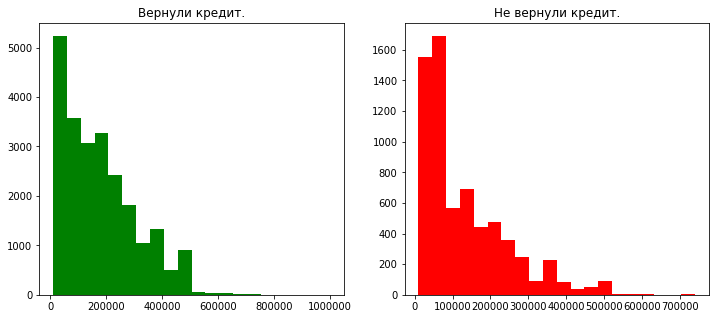

In [39]:
pylab.figure(figsize(12, 5))
pylab.subplot (1, 2, 1)
# pylab.bar(returned.ID, returned.LIMIT_BAL, align = 'center')
pylab.hist(returned.LIMIT_BAL, bins = 20, color = 'g')
pylab.title (u'Вернули кредит.')

pylab.subplot (1, 2, 2)
pylab.hist(not_returned.LIMIT_BAL, bins = 20, color = 'r')
pylab.title (u'Не вернули кредит.')

pylab.show()

Т.к. о типе распределения нам ничего неизвестно, то будем пользоваться бутстрапом, интервальной оценки медианы.

In [42]:
# генерируем n_samples выборок (вернётся набор индексов(!первый-второй аргумент) размером (n_samples, len(data))
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

# тут получаем уже сами выборки по индексам из функции выше
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [43]:
returned_median_scores = map(np.median, get_bootstrap_samples(returned.LIMIT_BAL.values, 100))
not_returned_median_scores = map(np.median, get_bootstrap_samples(not_returned.LIMIT_BAL.values, 1000))

print u"95% Доверительный интервал медианы для вернувших кредит:",  stat_intervals(returned_median_scores, 0.05)
print u"95% Доверительный интервал медианы для НЕ вернувших кредит:",  stat_intervals(not_returned_median_scores, 0.05)

95% Доверительный интервал медианы для вернувших кредит: [150000. 150000.]
95% Доверительный интервал медианы для НЕ вернувших кредит: [80000. 90000.]


**Выводы:** Как видим интервалы не пересекаются, значит с уровнем доверия 95% можно сделать вывод что медианы не равны.

In [ ]:
# проверьте гипотезу о равенстве распределений с помощью одного из подходящих непараметрических критериев 
# проверки равенства средних.


**Выводы:**

## Task 2

In [32]:
not_returned.LIMIT_BAL.values

array([ 20000, 120000,  70000, ...,  30000,  80000,  50000])

<function count>

## Task 3

## Task 4